# Python 資料科學學習手冊

> Python 機器學習模組

[數聚點](https://www.datainpoint.com) | 郭耀仁 <yaojenkuo@datainpoint.com>

## 關於 Scikit-Learn

## 什麼是 Scikit-Learn

> Scikit-learn 是 Python 機器學習的第三方模組，透過它可以進行監督式以及非監督式學習，提供了模型訓練、資料預處理、模型選擇以及模型評估等功能。

來源：<https://scikit-learn.org>

## 根據說明文件的範例載入

多數時候我們使用 Scikit-Learn 中的特定類別或函數，因此以 `from sklearn import FUNCTION/CLASS` 載入特定類別或函數，而非 `import sklearn`

來源：<https://scikit-learn.org/stable/getting_started.html>

## 為什麼選擇 Scikit-Learn

- 簡潔、一致且設計良善的應用程式介面設計，只要理解基礎用法和語法，就能延伸切換到其他的演算法或模型。
- 文件撰寫完整而豐富。
- 維護良善。

## Scikit-Learn 應用程式介面設計原則

1. 一致性。
2. 可檢查性。
3. 不擴增新類別。
4. 可組合性。
5. 合理預設參數。

## 什麼是機器學習

## 機器學習的三個要素、一個但書

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

來源：[Machine Learning, Tom Mitchell, McGraw Hill, 1997](http://www.cs.cmu.edu/~tom/mlbook.html)

## 傳統透過電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/3pojPXW.png?1)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定規則 $w$ 以及資料 $X$，我們就可以定義出函數 $f$ 生成答案 $y$

\begin{equation}
y = f(X;w) = Xw
\end{equation}

## 以機器學習的電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/YunyLd7.png)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定答案 $y$ 以及資料 $X$，機器學習的電腦程式在最小化損失函數 $J$ 的前提下生成規則 $w$，進而獲得預測 $\hat{y}$

\begin{equation}
\text{choose} \; w \in \{w^1, w^2, ..., w^n\} \\
\text{where} \; w \; \text{minimizes} \; J(w) \\
\text{subject to} \; \hat{y} = h(X; w) = Xw \\
\text{where} \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y} \\
\end{equation}

## 預測數值時最常見的損失函數 $J$

最小化均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i - \hat{y_i})^2
\end{align}

## 預測類別時最常見的損失函數 $J$

最小化預測錯誤個數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E_j) \text{ where } E_j \; \text{represents the occurrence of } y_j \neq \hat{y_j}
\end{align}

## 機器學習的資料表達

## 特徵矩陣與目標陣列

- 外型 `(m, n)` 的特徵矩陣 $X$
- 外型 `(m,)` 的目標陣列 $y$

In [1]:
import matplotlib.pyplot as plt

def plot_X_y():
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.axis('equal')
    # Draw features matrix
    ax.vlines(range(6), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=0, xmax=5, lw=1)
    font_prop = dict(size=12, family='monospace')
    ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
    ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
    ax.text(-0.1, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    # Draw labels vector
    ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=8, xmax=9, lw=1)
    ax.text(7, -1, "Target Array ($y$)", size=14)
    ax.text(7.9, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    ax.set_ylim(10, -2)
    plt.show()

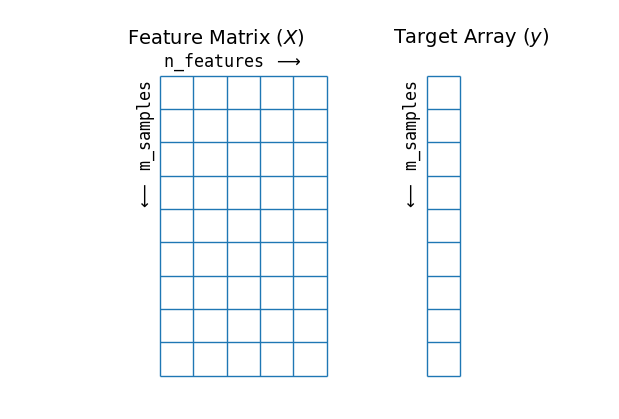

In [2]:
# 來源：<https://jakevdp.github.io/PythonDataScienceHandbook>
plot_X_y()

## 如何從 `DataFrame` 中擷取特徵矩陣與目標陣列

In [3]:
import pandas as pd

csv_url = "https://raw.githubusercontent.com/datainpoint\
/classroom-hahow-pythonfiftyplus/main/data/nba/player_stats.csv"
player_stats = pd.read_csv(csv_url) # import data
print(type(player_stats))
print(player_stats.shape)

<class 'pandas.core.frame.DataFrame'>
(503, 50)


## `player_stats` NBA 球員的基本資訊與生涯攻守數據

In [4]:
player_stats.head()

,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,isActive,pos,heightFeet,heightInches,...,ftm,fta,pFouls,points,gamesPlayed,gamesStarted,plusMinus,min,dd2,td3
0,Precious,Achiuwa,"Achiuwa, Precious",1630173,1610612748,5.0,True,F,6,8,...,56.0,110.0,91.0,304.0,61.0,4.0,-116.0,737.0,3.0,0.0
1,Steven,Adams,"Adams, Steven",203500,1610612740,12.0,True,C,6,11,...,936.0,1708.0,1497.0,5629.0,588.0,524.0,1638.0,15812.0,125.0,1.0
2,Bam,Adebayo,"Adebayo, Bam",1628389,1610612748,13.0,True,C-F,6,9,...,842.0,1141.0,668.0,3549.0,287.0,183.0,258.0,7840.0,91.0,5.0
3,Ty-Shon,Alexander,"Alexander, Ty-Shon",1630234,1610612756,0.0,True,G,6,3,...,1.0,2.0,2.0,9.0,15.0,0.0,-8.0,47.0,0.0,0.0
4,Nickeil,Alexander-Walker,"Alexander-Walker, Nickeil",1629638,1610612740,6.0,True,G,6,6,...,73.0,103.0,145.0,775.0,93.0,14.0,-105.0,1597.0,0.0,0.0


In [5]:
X = player_stats[["apg", "rpg"]].values # select 2 columns
y = player_stats["pos"].values          # select 1 column
print(X.shape)
print(y.shape)

(503, 2)
(503,)


In [6]:
X = player_stats["heightMeters"].values.reshape(-1, 1) # select 1 column
y = player_stats["weightKilograms"].values             # select 1 column
print(X.shape)
print(y.shape)

(503, 1)
(503,)


## 使用轉換器預處理資料

## 轉換器與預測器是 Scikit-Learn 所創造最重要的兩種類別

1. **轉換器（Transformers）：用來預處理資料**。
2. 預測器（Predictors）：用來訓練模型、生成規則 $w$

## 使用 Scikit-Learn 轉換器的標準步驟

1. 準備欲轉換的特徵矩陣 $X$ 或目標陣列 $y$
2. 建立轉換器類別的物件。
3. 將欲轉換的特徵矩陣 $X$ 或目標陣列 $y$ 輸入 `transformer.fit_transform()`
4. 檢查轉換結果。

## 使用 Scikit-Learn 轉換器 `PolynomialFeatures`

生成一個指定次方數的特徵多項式矩陣。

In [7]:
from sklearn.preprocessing import PolynomialFeatures

X = player_stats["heightMeters"].values.reshape(-1, 1) # step 1
polynomial_features = PolynomialFeatures()             # step 2
X_transformed = polynomial_features.fit_transform(X)   # step 3
print(X_transformed[:5])                               # step 4

[[1.     2.03   4.1209]
 [1.     2.11   4.4521]
 [1.     2.06   4.2436]
 [1.     1.9    3.61  ]
 [1.     1.98   3.9204]]


## 使用 Scikit-Learn 轉換器 `StandardScaler`

生成一個經過 z-score 標準化的特徵矩陣。

\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}

In [8]:
from sklearn.preprocessing import StandardScaler

X = player_stats["heightMeters"].values.reshape(-1, 1) # step 1
standard_scaler = StandardScaler()                     # step 2
X_transformed = standard_scaler.fit_transform(X)       # step 3
print(X_transformed[:5])                               # step 4

[[ 0.48558003]
 [ 1.42770829]
 [ 0.83887812]
 [-1.04537841]
 [-0.10325014]]


## 使用預測器訓練及預測資料

## 轉換器與預測器是 Scikit-Learn 所創造最重要的兩種類別

1. 轉換器（Transformers）：用來預處理資料。
2. **預測器（Predictors）：用來訓練模型、生成規則 $w$**

## 使用 Scikit-Learn 預測器的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 切割訓練與驗證資料。
3. 建立預測器類別的物件。
4. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
5. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
6. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

## 關於切割訓練與驗證資料

- 訓練資料：具有實際值或標籤的已實現歷史資料。
- 驗證資料：具有實際值或標籤的已實現歷史資料，但是在使用上偽裝成不具有實際值或標籤的待預測資料。
- 使用 `sklearn.model_selection` 的 `train_test_split()` 函數。
    - `test_size` 驗證資料比例。
    - `random_state` 觀測值洗牌的隨機種子。

In [9]:
from sklearn.model_selection import train_test_split

## 使用 Scikit-Learn 預測器 `LinearRegression`

- 線性迴歸模型。
- 數值預測器：NBA 球員的體重。

In [10]:
from sklearn.linear_model import LinearRegression

X = player_stats["heightMeters"].values.reshape(-1, 1)                       # step 1
y = player_stats["weightKilograms"].values                                   # step 1
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42) # step 2
linear_regression = LinearRegression()                                       # step 3
linear_regression.fit(X_train, y_train)                                      # step 4
y_hat = linear_regression.predict(X_valid)                                   # step 5
m = y_valid.size                                                             # step 6
mean_squared_error = ((y_valid - y_hat)**2).sum()/m                          # step 6

## 使用 Scikit-Learn 預測器 `LogisticRegression`

- 羅吉斯迴歸模型。
- 類別預測器（分類器）：NBA 球員的鋒衛位置。

In [11]:
from sklearn.linear_model import LogisticRegression

pos_dict = {value: index for index, value in enumerate(player_stats["pos"].unique())}
X = player_stats[["apg", "rpg"]].values       # step 1
y = player_stats["pos"].map(pos_dict).values  # step 1
print(player_stats["pos"].unique())
print(pos_dict)
print(y[:5])

['F' 'C' 'C-F' 'G' 'F-G' 'G-F' 'F-C']
{'F': 0, 'C': 1, 'C-F': 2, 'G': 3, 'F-G': 4, 'G-F': 5, 'F-C': 6}
[0 1 2 3 3]


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42) # step 2
logistic_regression = LogisticRegression()                                   # step 3
logistic_regression.fit(X_train, y_train)                                    # step 4
y_hat = logistic_regression.predict(X_valid)                                 # step 5
number_of_misclassification = (y_valid != y_hat).sum()                       # step 6
print(number_of_misclassification)                                           # step 6

54


## 可檢查性：每個轉換器或預測器都有屬性讓使用者檢視轉換或預測的規則

In [13]:
print(polynomial_features.degree)
print(standard_scaler.mean_)
print(standard_scaler.scale_)
print(linear_regression.intercept_)
print(linear_regression.coef_)

2
[1.9887674]
[0.08491413]
-99.05995720054044
[99.1199283]


## 關於監督式學習

## 什麼是模型

- 模型（Model）是一個類似於「函數」的概念，由參數與運算組成。
- 模型的參數以及運算可以透過不同的方式生成，生成方式包含規則敘述與歷史資料訓練。
    - 透過規則敘述生成參數以及運算，稱為基於規則的模型（Rule-based model）或稱專家模型。
    - 透過歷史資料訓練生成參數以及運算，稱為基於演算法的模型（Algorithm-based model）或稱基於機器學習的模型。
- 不同模型除了相互比較，也可以與基準（Baseline）模型比較，常用來作為基準模型的像是基於隨機的黑猩猩模型或稱虛假模型（Dummy model），像是以投擲硬幣、骰子或者射飛鏢來決定模型的輸出。

## 可以採用哪種模型解決問題

- 採用基於規則的模型：
    - 問題能用人類語言描述邏輯、撰寫規則。
    - 答案不能容忍誤差。
- 採用基於機器學習的模型：
    - 問題非領域專家不容易描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。

## 可以採用哪種模型解決問題（續）

- 採用基於規則的模型：給定整數判斷它是否為奇數、偶數或者質數。
- 採用基於機器學習的模型：給定一位 NBA 球員的生涯場均助攻與場均籃板來猜他是中鋒、前鋒、後衛或者能夠打多個位置的搖擺人、中前鋒、雙能衛等鋒衛位置。

## 基於機器學習的模型可再分為

- 監督式學習：訓練資料中具備已實現的數值或標籤。
    - 迴歸：數值預測的任務。
    - 分類：類別預測的任務。
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤。

## 數值預測的任務

## 數值預測的任務：迴歸模型

- 「數值預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於連續型數值變數。
- 更常被稱為「迴歸模型」。

## 預測數值時最常見的損失函數 $J$

最小化訓練資料的均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i^{(train)} - \hat{y_i}^{(train)})^2
\end{align}

## 預測 NBA 球員的體重

- 資料（Experience）：一定數量的球員資料。
- 任務（Task）：利用模型預測球員的體重。
- 評估（Performance）：模型預測的體重與球員實際體重的誤差大小。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤差應該要減少。

In [14]:
import pandas as pd

player_stats = pd.read_csv(csv_url)
y = player_stats["weightKilograms"].values
y.dtype # y is a numeric variable

dtype('float64')

## 該如何預測 NBA 球員的體重

1. 虛假模型。
2. 基於規則的專家模型。
3. 基於機器學習的模型。

## 虛假模型

在 NBA 球員體重全距之間取隨機整數。

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_max, y_min = y.max(), y.min()
y_hat = np.random.randint(low=y_min, high=y_max, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [16]:
from sklearn.metrics import mean_squared_error

mse_dummy = mean_squared_error(y_valid, y_hat)
mse_dummy

589.6034939759036

## 基於規則的專家模型

根據 NBA 球員的鋒衛位置取其平均體重。

In [17]:
mean_weight_by_pos = player_stats.groupby("pos")["weightKilograms"].mean()
mean_weight = player_stats["pos"].map(mean_weight_by_pos).values
mean_weight_train, y_hat = train_test_split(mean_weight, test_size=0.33, random_state=42)

## 評估基於規則的專家模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [18]:
mse_expert = mean_squared_error(y_valid, y_hat)
mse_expert

50.668004006804765

## 基於機器學習的模型

將 `heightMeters` 當作特徵矩陣 $x_i$ 作為體重的預測依據。

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2} = \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - x_i^{(train)} w)^2}
\end{equation}

## 使用 Scikit-Learn 預測器的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 切割訓練與驗證資料。
3. 建立預測器類別的物件。
4. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
5. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
6. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [19]:
from sklearn.linear_model import LinearRegression

X = player_stats["heightMeters"].values.reshape(-1, 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_hat = linear_regression.predict(X_valid)

## 評估基於機器學習的模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [20]:
mse_ml = mean_squared_error(y_valid, y_hat)
mse_ml

62.807098266825335

## 該如何預測 NBA 球員的體重：考量哪個模型驗證資料與預測資料的均方誤差最小

1. 基於規則的專家模型。
2. 基於機器學習的模型。
3. 虛假模型。

In [21]:
print(mse_expert)
print(mse_ml)
print(mse_dummy)

50.668004006804765
62.807098266825335
589.6034939759036


## 類別預測的任務

## 類別預測的任務：分類器

- 「類別預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於離散型的類別變數。
- 更常被稱為「分類器」。

## 預測類別時最常見的損失函數 $J$

最小化訓練資料的誤分類數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E^{(train)}_j) \text{ where } E^{(train)}_j \; \text{represents the occurrence of } y^{(train)}_j \neq \hat{y^{(train)}_j}
\end{align}

## 預測 NBA 球員的鋒衛位置

- 資料（Experience）：一定數量的球員資料。
- 任務（Task）：利用模型預測球員的鋒衛位置。
- 評估（Performance）：模型預測的鋒衛位置與球員實際鋒衛位置的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

In [22]:
# players_stats 資料中的 pos
player_stats["pos"].values.dtype

dtype('O')

## `player_stats` 資料中的 `pos` 有 7 個不同的類別

In [23]:
print(player_stats["pos"].unique())
print(player_stats["pos"].nunique())

['F' 'C' 'C-F' 'G' 'F-G' 'G-F' 'F-C']
7


## 先將多元分類問題簡化為二元分類問題

- 鋒衛位置分作後衛（G）與前鋒（F）。
- 分別對應整數 1 與整數 0。

In [24]:
pos_binary = player_stats["pos"].map(lambda x: 0 if x[0] == "G" else 1)
y = pos_binary.values
np.unique(y)

array([0, 1])

## 該如何預測 NBA 球員的鋒衛位置

1. 虛假模型。
2. 基於規則的專家模型。
3. 基於機器學習的模型。

## 虛假模型

在 0 與 1 之間取隨機整數。

In [25]:
y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_hat = np.random.randint(0, 2, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [26]:
errors_dummy = np.sum(y_valid != y_hat)
print(errors_dummy)
print(y_valid.size)
print(errors_dummy / y_valid.size)

80
166
0.4819277108433735


## 基於規則的專家模型

根據 NBA 球員的場均助攻數決定，場均助攻超過平均值則是 0，小於等於平均值則是 1。

In [27]:
mean_apg = player_stats["apg"].mean()
mean_apg_train_y_hat = player_stats["apg"].map(lambda x: 0 if x > mean_apg else 1).values
mean_apg_train, y_hat = train_test_split(mean_apg_train_y_hat, test_size=0.33, random_state=42)

## 評估專家模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [28]:
errors_expert = np.sum(y_valid != y_hat)
print(errors_expert)
print(y_valid.size)
print(errors_expert / y_valid.size)

58
166
0.3493975903614458


## 基於機器學習的模型

將 `apg` 與 `rpg` 當作特徵矩陣 $X$ 作為鋒衛位置的預測依據。

## 使用 Scikit-Learn 預測器的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 切割訓練與驗證資料。
3. 建立預測器類別的物件。
4. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
5. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
6. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [29]:
from sklearn.linear_model import LogisticRegression

X = player_stats[["apg", "rpg"]].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_hat = logistic_regression.predict(X_valid)

## 評估基於機器學習的模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [30]:
errors_ml = np.sum(y_valid != y_hat)
print(errors_ml)
print(y_valid.size)
print(errors_ml / y_valid.size)

28
166
0.1686746987951807


## 該如何預測 NBA 球員的鋒衛位置：考量哪個模型驗證資料與預測資料的誤分類數最少

1. 機器學習模型。
2. 專家模型。
3. 虛假模型。

In [31]:
print(y_valid.size)
print(errors_ml)
print(errors_expert)
print(errors_dummy)

166
28
58
80


## 無法描述規則的任務

## 前面的數值、類別預測任務我們都有建立基於規則的專家模型

- 有一些問題無法建立基於規則的專家模型，像是影像分類、語音識別或機器翻譯等，都屬於無法描述規則的任務。
- 對人類來說影像分類、語音識別或語言翻譯是很輕易能辦到的，但要寫出其中的規則、邏輯是極其困難的。

## 該如何處理無法描述規則的任務

- 以機器學習領域的一個分支**深度學習**來處理。
- 深度學習是一種不需要使用者**直接**決定特徵的最適化方法，而是由深度學習的結構**間接**決定。
    - 面對數值或類別的預測任務，若是採用機器學習，係數**直接**由特徵矩陣 $X$ 的欄位個數決定。
    - 面對數值或類別的預測任務，若是採用深度學習，係數會改由深度（Depth）、或者稱為層數（Number of layers）決定。

## 什麼是深度學習

- 以集合概念來說明的話，深度學習包含於機器學習之中，是機器學習集合的子集合。
- 深度學習使用連續且多層的數值轉換從訓練資料中同時進行特徵工程（Feature engineering）以及係數 $w$ 的最適化。
- 簡言之，我們可以將深度學習視為一種不需要使用者直接進行「特徵工程」（Feature engineering）的最適化方法，使用者透過定義層數來間接決定特徵工程的規模，當深度學習的層數愈多、單位愈多，意味著特徵工程的規模愈大。

## 現代的基礎深度學習模型

- 基礎深度學習模型由充滿單位（又稱神經元，Neuron）的層數堆疊而成，每層的多個單位會因為目的性而有不同的相連狀態。
- 把結構中某一層的所有單位都與前一層以及後一層的所有單位相連，稱為完全連接層（Fully-connected layers）或密集層（Dense layers）。
- 深度學習模型具備了層數的結構，模型 $h$ 也成為了有鏈結的關係、係數 $W$ 也成為矩陣外型，而非前述的向量外型。

\begin{align}
\hat{y} &= h(X; W) \\
&= h^{(n)}(X;w^{(n)}...(h^{(2)}(X; w^{(2)};(h^{(1)}(X; w^{(1)})))))
\end{align}

## 現代的基礎深度學習模型（續）

- 其中 $h^{(1)}$ 稱為「輸入層」（Input layer），$ h^{(n)}$ 稱為「輸出層」（Output layer），介於這兩層之間的 $h^{(i)}$ 則稱為「隱藏層」（Hidden layer）。
- 深度學習模型與傳統機器學習模型最大的差別，在於是否有隱藏層的存在，意即一個最基本、最淺的深度學習模型至少具有三層。

\begin{align}
\hat{y} &= h(X; W) \\
&= h^{(3)}(X; w^{(3)}(h^{(2)}(X; w^{(2)}(h^{(1)}(X; w^{(1)})))))
\end{align}

## 尋找係數的演算方法

- 在機器學習中廣泛使用的演算方法稱為「梯度遞減」（Gradient descent）。
- 基本概念是先隨機初始化一組係數向量，在基於降低 $y^{(train)}$ 與 $\hat{y}^{(train)}$ 之間誤差 $J(w)$ 之目標之下，以迭代方式更新該組係數向量，一直到 $J(w)$ 收斂到局部最小值為止。

## 機器學習與梯度遞減

- 更新係數向量時，並不是盲目亂槍打鳥地試誤（Trial and error）
- 根據誤差 $J(w)$ 關於係數向量 $w$ 的偏微分來決定更新的方向性，而更新的幅度大小則由一個大於零、稱為「學習速率」的常數 $\alpha$ 決定：

\begin{equation}
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

## 深度學習模型與反向傳播

- 隱藏層的存在造就了尋找深度學習模型最適的 $W$ 時，跟機器學習的「梯度遞減」有異曲同工的地方。
- 同工：
    - 起始隨機初始化的 $W$ 所預測目標向量 $\hat{y}$ 會與實際目標向量 $y$ 相差甚遠，兩者之間的誤差也會很大。
- 異曲：
    - 透過「反向傳播」（Backpropagation）的演算方法來進行梯度遞減、微調每層的係數。
    - 因為深度學習模型中至少有一個「隱藏層」的存在，導致 $\hat{y}$ 與 $y$ 之間的誤差僅能回饋到前一個隱藏層與輸出層之間的 $W$ 作為更新依據。
    - 更前段層數之間 $W$ 的更新依據，則改由後段層數回饋。
- 簡言之，我們可以將「反向傳播」類比為專門設計給深度學習模型的梯度遞減演算方法。

## Tensorflow Keras 與 PyTorch Lightning

## 關於 Tensorflow

- TensorFlow 是機器學習與深度學習的後端引擎（Backend engine），由 Google 在 2015 年釋出。
- 後端引擎將各種類型的張量運算、成本函數定義、成本函數微分運算、梯度遞減演算法、反向傳播演算法、優化型態的梯度遞減演算法、優化型態的反向傳播演算法等，各種開發者需要客製化自己的深度學習模型所需要的元件定義成為類別或函數。
- TensorFlow 相似、齊名的後端引擎有 PyTorch、Theano 與 Microsoft Cognitive Toolkit(CNTK)。

## 關於 Tensorflow Keras

- Keras 是基於機器學習與深度學習的後端引擎所設計之應用程式介面（Application Programming Interface, API），由 François Chollet 在 2015 釋出。
- Keras 在最一開始的時候被設計為支援「主流」機器學習與深度學習後端引擎的框架；但目前可以視為 TensorFlow 的應用程式介面。
- 所謂的應用程式介面可以理解為後端引擎的包裝函數，讓其所提供的功能更容易被開發者使用。

## 關於 PyTorch

- PyTorch 是機器學習與深度學習的後端引擎（Backend engine），由 Meta 在 2016 年釋出。
- 將使用難度、客製化彈性定位介於 TensorFlow 1.x 與 Keras 之間的後端引擎。
- 強調 Python First、除錯簡易與記憶體管理的優化。
    - Python First：需要繼承 PyTorch 定義好的類別，再去客製化自己要的模型，必須有良好的 Python 物件導向觀念。

## 關於 PyTorch Lightning

PyTorch Lightning 是基於 PyTorch 所設計的應用程式介面（Application Programming Interface, API），由 William Falcon 在 2019 釋出。

## 根據說明文件的範例載入

```shell
!pip uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip install torch torchaudio torchvision torchtext torchdata
!pip install pytorch-lightning
```

來源：<https://keras.io/api>, <https://pytorch.org/docs/2.0/>, <https://lightning.ai/docs/pytorch/stable/>

In [32]:
#!pip install lightning
from tensorflow import keras
import torch
import lightning as L

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 辨識 Fashion MNIST 圖片的衣服種類

- 資料（Experience）：一定數量的衣服圖片。
- 任務（Task）：利用模型辨識衣服種類。
- 評估（Performance）：模型辨識的衣服種類與實際衣服種類的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

## Fashion MNIST 圖片資料中的 `label` 有 10 個不同的類別

```python
fashion_mnist_labels = {
    0: "T-shirt/top",  # index 0
    1: "Trouser",      # index 1
    2: "Pullover",     # index 2 
    3: "Dress",        # index 3 
    4: "Coat",         # index 4
    5: "Sandal",       # index 5
    6: "Shirt",        # index 6 
    7: "Sneaker",      # index 7 
    8: "Bag",          # index 8 
    9: "Ankle boot"    # index 9
}
```

In [33]:
class ImshowSubplots:
    """
    This class plots 2d-arrays with subplots.
    Args:
        rows (int): The number of rows of axes.
        cols (int): The number of columns of axes.
        fig_size (tuple): Figure size.
    """
    def __init__(self, rows, cols, fig_size):
        self._rows = rows
        self._cols = cols
        self._fig_size = fig_size
    def im_show(self, X, y, label_dict=None):
        """
        This function plots 2d-arrays with subplots.
        Args:
            X (ndarray): 2d-arrays.
            y (ndarray): Labels for 2d-arrays.
            label_dict (dict): Str labels for y if any.
        """
        n_pics = self._rows*self._cols
        first_n_pics = X[:n_pics, :, :]
        first_n_labels = y[:n_pics]
        fig, axes = plt.subplots(self._rows, self._cols, figsize=self._fig_size)
        for i in range(n_pics):
            row_idx = i % self._rows
            col_idx = i // self._rows
            axes[row_idx, col_idx].imshow(first_n_pics[i], cmap="Greys")
            if label_dict is not None:
                axes[row_idx, col_idx].set_title("Label: {}".format(label_dict[first_n_labels[i]]))
            else:
                axes[row_idx, col_idx].set_title("Label: {}".format(first_n_labels[i]))
            axes[row_idx, col_idx].set_xticks([])
            axes[row_idx, col_idx].set_yticks([])
        plt.tight_layout()
        plt.show()

4422102/4422102 [==============================] - 1s 0us/step


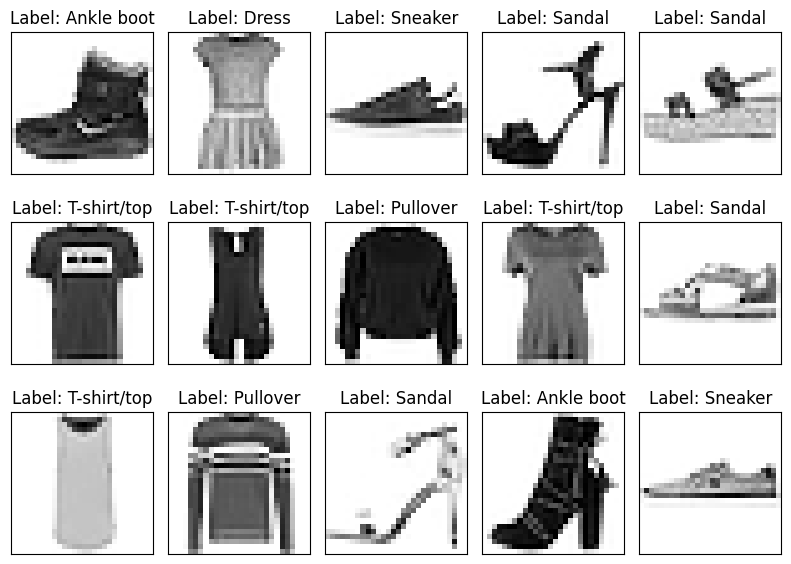

In [34]:
fashion_mnist_labels = {
    0: "T-shirt/top",  # index 0
    1: "Trouser",      # index 1
    2: "Pullover",     # index 2 
    3: "Dress",        # index 3 
    4: "Coat",         # index 4
    5: "Sandal",       # index 5
    6: "Shirt",        # index 6 
    7: "Sneaker",      # index 7 
    8: "Bag",          # index 8 
    9: "Ankle boot"    # index 9
}
(x_train, y_train), (x_valid, y_valid) = keras.datasets.fashion_mnist.load_data()
iss = ImshowSubplots(3, 5, (8, 6))
iss.im_show(x_train, y_train, label_dict=fashion_mnist_labels)

## 辨識 Fashion MNIST 圖片的衣服種類

1. 虛假模型。
2. ~~基於規則的專家模型。~~
3. 基於深度學習的模型。

## 虛假模型

在 0 與 9 之間取隨機整數。

In [35]:
y_hat = np.random.randint(0, 10, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [36]:
errors_dummy = np.sum(y_valid != y_hat)
print("Error rate: {:.2f}%".format((errors_dummy / y_valid.size)*100))

Error rate: 90.36%


## 基於深度學習的模型：使用 keras 建立

In [37]:
num_classes = 10
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [38]:
x_train = x_train.astype("float32") / 255
x_valid = x_valid.astype("float32") / 255
x_train = x_train[:, :, :, np.newaxis]
x_valid = x_valid[:, :, :, np.newaxis]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [39]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)
y_hat = model.predict(x_valid)

Epoch 1/15
422/422 [==============================] - 86s 200ms/step - loss: 0.6984 - accuracy: 0.7471 - val_loss: 0.4436 - val_accuracy: 0.8442
Epoch 2/15
422/422 [==============================] - 59s 139ms/step - loss: 0.4551 - accuracy: 0.8373 - val_loss: 0.3899 - val_accuracy: 0.8585
Epoch 3/15
422/422 [==============================] - 60s 142ms/step - loss: 0.4025 - accuracy: 0.8565 - val_loss: 0.3594 - val_accuracy: 0.8715
Epoch 4/15
422/422 [==============================] - 67s 159ms/step - loss: 0.3730 - accuracy: 0.8665 - val_loss: 0.3306 - val_accuracy: 0.8822
Epoch 5/15
422/422 [==============================] - 58s 138ms/step - loss: 0.3532 - accuracy: 0.8732 - val_loss: 0.3118 - val_accuracy: 0.8867
Epoch 6/15
422/422 [==============================] - 59s 141ms/step - loss: 0.3391 - accuracy: 0.8785 - val_loss: 0.3066 - val_accuracy: 0.8905
Epoch 7/15
422/422 [==============================] - 58s 136ms/step - loss: 0.3246 - accuracy: 0.8838 - val_loss: 0.2998 - val_ac

## 評估深度學習的模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [40]:
loss, accuracy = model.evaluate(x_valid, y_valid)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Error rate: {:.2f}%".format((1 - accuracy)*100))

313/313 [==============================] - 3s 11ms/step - loss: 0.2711 - accuracy: 0.9012
Accuracy: 90.12%
Error rate: 9.88%


## 基於深度學習的模型：使用 PyTorch Lightning 建立

In [41]:
import os
from lightning.pytorch.loggers import CSVLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms
from torchvision.datasets import FashionMNIST as MNIST

PATH_DATASETS = os.getcwd()
if torch.cuda.is_available():
    BATCH_SIZE = 256
else:
    BATCH_SIZE = 64

In [42]:
class FashionMNISTModel(L.LightningModule):
    def __init__(self, data_dir=PATH_DATASETS, hidden_size=64, learning_rate=2e-4):
        super().__init__()
        self.data_dir = data_dir
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.num_classes = 10
        self.dims = (1, 28, 28)
        channels, width, height = self.dims
        self.transform = transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,)),
            ]
        )
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(channels * width * height, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size, self.num_classes),
        )
        self.val_accuracy = Accuracy(task="multiclass", num_classes=10)
        self.test_accuracy = Accuracy(task="multiclass", num_classes=10)
    def forward(self, x):
        x = self.model(x)
        return F.log_softmax(x, dim=1)
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        return loss
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        self.val_accuracy.update(preds, y)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", self.val_accuracy, prog_bar=True)
    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        self.test_accuracy.update(preds, y)
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.test_accuracy, prog_bar=True)
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer
    def prepare_data(self):
        MNIST(self.data_dir, train=True, download=True)
        MNIST(self.data_dir, train=False, download=True)
    def setup(self, stage=None):
        if stage == "fit" or stage is None:
            mnist_full = MNIST(self.data_dir, train=True, transform=self.transform)
            self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])
        if stage == "test" or stage is None:
            self.mnist_test = MNIST(self.data_dir, train=False, transform=self.transform)
    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=BATCH_SIZE)
    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=BATCH_SIZE)
    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=BATCH_SIZE)

In [43]:
model = FashionMNISTModel()
trainer = L.Trainer(
    accelerator="auto",
    devices=1,
    max_epochs=5,
    logger=CSVLogger(save_dir="logs/"),
)
trainer.fit(model)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


100%|██████████| 26421880/26421880 [00:00<00:00, 117257298.30it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5761921.46it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 61367461.20it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5274127.26it/s]


Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



INFO: 
  | Name          | Type               | Params
-----------------------------------------------------
0 | model         | Sequential         | 55.1 K
1 | val_accuracy  | MulticlassAccuracy | 0     
2 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
55.1 K    Trainable params
0         Non-trainable params
55.1 K    Total params
0.220     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name          | Type               | Params
-----------------------------------------------------
0 | model         | Sequential         | 55.1 K
1 | val_accuracy  | MulticlassAccuracy | 0     
2 | test_accuracy | MulticlassAccuracy | 0     
-----------------------------------------------------
55.1 K    Trainable params
0         Non-trainable params
55.1 K    Total params
0.220     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [44]:
trainer.test()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
INFO: Restoring states from the checkpoint path at logs/lightning_logs/version_0/checkpoints/epoch=4-step=4300.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at logs/lightning_logs/version_0/checkpoints/epoch=4-step=4300.ckpt
INFO: Loaded model weights from the checkpoint at logs/lightning_logs/version_0/checkpoints/epoch=4-step=4300.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at logs/lightning_logs/version_0/checkpoints/epoch=4-step=4300.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8621000051498413     │
│         test_loss         │    0.38053372502326965    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.38053372502326965, 'test_acc': 0.8621000051498413}]

## 該如何辨識 Fashion MNIST 圖片的衣服種類：考量哪個模型驗證資料與預測資料的誤分類數最少

1. 深度學習模型。
2. 虛假模型。